/var/folders/9z/f33049_x6bs5y2xvclxp23j00000gn/T/ipykernel_4681/833782601.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(unique_models))  # 使用 'tab20' 确保更多的颜色


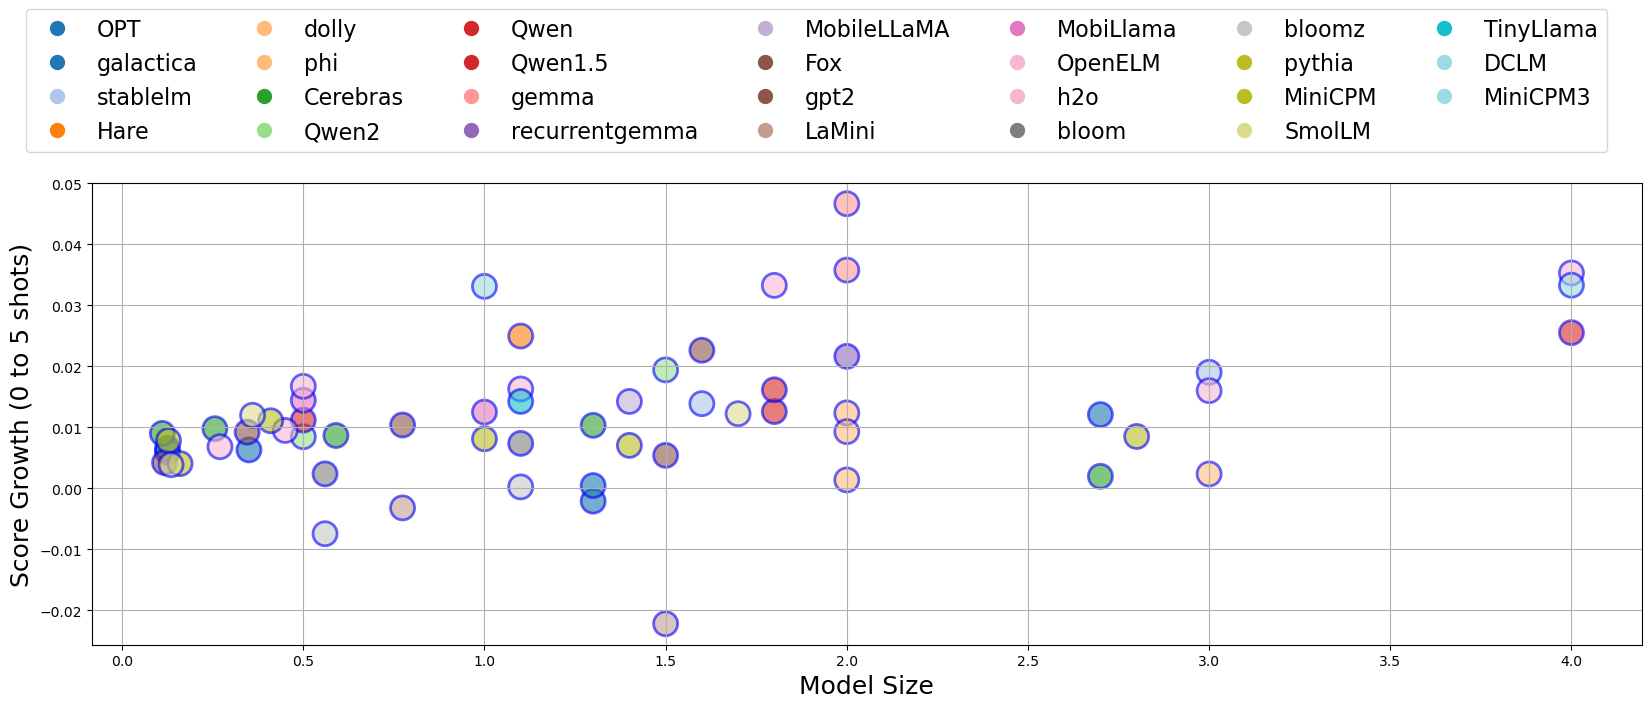

In [8]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假设已经从文件读取到 JSON 数据
with open('dataset_records.json', 'r') as f:
    data = json.load(f)

# 创建存储模型尺寸和分数增长的列表
model_sizes = []
model_names = []
growth_scores = []

with open('normalized_models.txt', 'r') as f:
    # 不要带\n
    normalized_model_name = f.readlines()
    normalized_model_name = [line.strip() for line in normalized_model_name]

# 遍历每个模型的条目
# 遍历每个模型的条目
for index, (model, scores) in enumerate(data.items()):
    model = normalized_model_name[index]
    size_str = model.split("-")[-1].replace("m", "M").replace("b", "B")
    try:
        size = float(size_str[:-1]) * (1e9 if "B" in size_str else 1e6)  # 将尺寸转换为字节
        # print(model, size/1e9)
    except ValueError:
        continue  # 跳过无法识别的大小
    
    # 计算该模型在 0 到 5 的分数增长
    initial_scores = [np.mean([category.get("0", 0) for category in scores.values()])]
    final_scores = [np.mean([category.get("5", 0) for category in scores.values()])]
    
    # 计算增长量（0 -> 5）
    score_growth = final_scores[0] - initial_scores[0]
    
    # 提取模型的基本系列名称，如 'opt' 或 'gpt'
    model_base_name = model.split('/')[1].split('-')[0]
    
    model_sizes.append(size / 1e9)  # 将模型尺寸转换为 B（十亿字节）
    model_names.append(model_base_name)  # 使用模型的基本系列名称来进行颜色映射
    growth_scores.append(score_growth)

# 创建数据框以便于处理
df = pd.DataFrame({"Model": model_names, "Size": model_sizes, "Growth": growth_scores})

# 获取唯一的模型系列名称
unique_models = df["Model"].unique()

# 使用 'tab20' 色彩图，以便获得更多颜色
cmap = cm.get_cmap('tab20', len(unique_models))  # 使用 'tab20' 确保更多的颜色
model_to_color = {model: cmap(i) for i, model in enumerate(unique_models)}

# 为每个模型系列分配相应的颜色
colors = df["Model"].map(model_to_color)

# 设置大小
sizes = np.full(len(df), 300)  # 固定圆圈大小

# 绘制模型分数增长量与模型尺寸的关系
plt.figure(figsize=(20, 6))
scatter = plt.scatter(df["Size"], df["Growth"], c=colors, s=sizes, alpha=0.6, edgecolors='b', linewidth=2)

# # 为每个模型系列标注一次
# for model in unique_models:
#     first_row = df[df["Model"] == model].iloc[0]
#     plt.text(first_row["Size"], first_row["Growth"], model, fontsize=12, fontweight='bold')

# plt.xscale('log')  # 使用对数尺度显示模型尺寸
plt.xlabel('Model Size', fontsize=18)  # 更新横坐标标签, 设置字体大小
plt.ylabel('Score Growth (0 to 5 shots)', fontsize=18)
# plt.title('Score Growth from 0 to 5 vs. Model Size')
plt.grid(True)

# 添加图例
handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), label=model, markersize=10, linestyle='None') 
           for i, model in enumerate(unique_models)]
plt.legend(handles=handles, ncol = 7, bbox_to_anchor=(-0.05, 1.4), loc='upper left', fontsize=16)

# 统一调整字体
# plt.rc('font', size=15)  # 统一设置字体大小
# 显示图表
plt.savefig('../figs/score_growth_vs_model_size.pdf', bbox_inches='tight')  # 保存图表
plt.show()

In [5]:
df

Model   Size    Growth
0              OPT  0.350  0.006279
1        galactica  0.125  0.005951
2        galactica  1.300 -0.002124
3              OPT  0.125  0.006522
4              OPT  1.300  0.000433
5              OPT  2.700  0.012068
6         stablelm  3.000  0.018995
7         stablelm  1.600  0.013857
8             Hare  1.100  0.024940
9            dolly  3.000  0.002336
10             phi  2.000  0.001358
11             phi  2.000  0.012339
12             phi  2.000  0.009275
13        Cerebras  2.700  0.001954
14        Cerebras  0.256  0.009751
15        Cerebras  0.590  0.008641
16        Cerebras  0.111  0.008979
17        Cerebras  1.300  0.010301
18           Qwen2  1.500  0.019392
19            Qwen  1.800  0.012563
20         Qwen1.5  4.000  0.025493
21           Qwen2  0.500  0.008427
22         Qwen1.5  0.500  0.011157
23         Qwen1.5  1.800  0.016133
24           gemma  2.000  0.046625
25  recurrentgemma  2.000  0.021612
26           gemma  2.000  0.035744
27     MobileLLaMA  1.400  0.014221
28             Fox  1.600  0.022609
29            gpt2  0.774  0.010357
30            gpt2  0.345  0.009186
31            gpt2  0.117  0.004201
32            gpt2  1.500  0.005381
33          LaMini  0.774 -0.003228
34          LaMini  1.500 -0.022211
35       MobiLlama  0.500  0.014420
36       MobiLlama  1.000  0.012482
37         OpenELM  0.270  0.006798
38         OpenELM  0.450  0.009464
39         OpenELM  1.100  0.016261
40         OpenELM  3.000  0.015990
41             h2o  1.800  0.033237
42             h2o  0.500  0.016701
43             h2o  4.000  0.035283
44           bloom  0.560  0.002351
45          bloomz  0.560 -0.007460
46           bloom  1.100  0.007341
47          bloomz  1.100  0.000213
48          pythia  1.400  0.007019
49          pythia  0.410  0.011053
50          pythia  1.000  0.008092
51          pythia  0.160  0.004038
52          pythia  2.800  0.008478
53         MiniCPM  0.128  0.007813
54          SmolLM  0.135  0.003847
55          SmolLM  0.360  0.011951
56          SmolLM  1.700  0.012206
57       TinyLlama  1.100  0.014220
58            DCLM  1.000  0.033080
59        MiniCPM3  4.000  0.033272